In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 18

# .75 in con. MEDIUM FOR CONSTANTS. 
#READ ALL CODE. 
#read hddm paper.
#half hour for talk+questions.
#change the number of trials. find where (small subset) of trials yields fit pattern.
#compare fit to drift rate. 

In [2]:
#conflict as reward probabilities
n_trials, n_targets = 1000, 2

hc_p, mc_p, lc_p = .5, .7, .90

#initialize uniform dist.  
uni_dist = np.random.uniform(0, 1, n_trials)
lc_rewarding_target = uni_dist <= lc_p
mc_rewarding_target = uni_dist <= mc_p
hc_rewarding_target = uni_dist <= hc_p

#make sure p = stated above 
while (sum(lc_rewarding_target)/n_trials) != lc_p: 
    uni_dist = np.random.uniform(0, 1, n_trials)
    lc_rewarding_target = uni_dist <= lc_p

while (sum(mc_rewarding_target)/n_trials) != mc_p: 
    uni_dist = np.random.uniform(0, 1, n_trials)
    mc_rewarding_target = uni_dist <= mc_p
    
while (sum(hc_rewarding_target)/n_trials) != hc_p: 
    uni_dist = np.random.uniform(0, 1, n_trials)
    hc_rewarding_target = uni_dist <= hc_p
    
hc_binary_t1, hc_binary_t2 = np.zeros((n_trials)), np.zeros((n_trials))
mc_binary_t1, mc_binary_t2 = np.zeros((n_trials)), np.zeros((n_trials))
lc_binary_t1, lc_binary_t2 = np.zeros((n_trials)), np.zeros((n_trials))

np.random.shuffle(lc_rewarding_target)
np.random.shuffle(mc_rewarding_target)
np.random.shuffle(hc_rewarding_target)


hc_binary_t1[hc_rewarding_target] = 1
hc_binary_t2[~hc_rewarding_target] = 1

mc_binary_t1[mc_rewarding_target] = 1
mc_binary_t2[~mc_rewarding_target] = 1

lc_binary_t1[lc_rewarding_target] = 1
lc_binary_t2[~lc_rewarding_target] = 1

Text(0.5,0,'t')

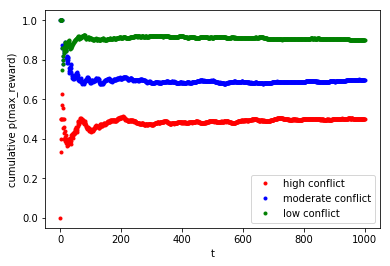

In [3]:
t_range = np.arange(1,n_trials+1)
hc_cumulative_p = np.cumsum(hc_binary_t1)/t_range
mc_cumulative_p = np.cumsum(mc_binary_t1)/t_range
lc_cumulative_p = np.cumsum(lc_binary_t1)/t_range
plt.plot(hc_cumulative_p, 'r.', label='high conflict')
plt.plot(mc_cumulative_p, 'b.', label='moderate conflict')
plt.plot(lc_cumulative_p, 'g.', label='low conflict')
plt.legend()
plt.ylabel('cumulative p(max_reward)')
plt.xlabel('t')

In [4]:
#reward values 
r_mu = 50
r_std = 10 
n_samples = n_trials 
rewards = np.random.normal(loc=r_mu, scale=r_std, size=n_trials)

hc_rewards_t1 = np.zeros_like(hc_binary_t1)
mc_rewards_t1 = np.zeros_like(mc_binary_t1)
lc_rewards_t1 = np.zeros_like(lc_binary_t1)

hc_rewards_t2 = np.zeros_like(hc_rewards_t1)
mc_rewards_t2 = np.zeros_like(mc_rewards_t1)
lc_rewards_t2 = np.zeros_like(lc_rewards_t1)

hc_rewards_t1[hc_rewarding_target] = rewards[hc_rewarding_target]
hc_rewards_t2[~hc_rewarding_target] = rewards[~hc_rewarding_target]

mc_rewards_t1[mc_rewarding_target] = rewards[mc_rewarding_target]
mc_rewards_t2[~mc_rewarding_target] = rewards[~mc_rewarding_target]

lc_rewards_t1[lc_rewarding_target] = rewards[lc_rewarding_target]
lc_rewards_t2[~lc_rewarding_target] = rewards[~lc_rewarding_target]

In [5]:
#volatility 
lv_lambda, mv_lambda, hv_lambda = 30, 20, 10
lv_size, mv_size, hv_size = int(n_trials/lv_lambda),int(n_trials/mv_lambda),  int(n_trials/hv_lambda)

In [6]:
#find change point indices and slice to fit n_trials 
lv_lam = np.cumsum(np.random.poisson(lam=lv_lambda,size=lv_size))
mv_lam = np.cumsum(np.random.poisson(lam=mv_lambda,size=mv_size))
hv_lam = np.cumsum(np.random.poisson(lam=hv_lambda,size=hv_size))

hv_lam = hv_lam[hv_lam < n_trials]
mv_lam = mv_lam[mv_lam < n_trials]
lv_lam = lv_lam[lv_lam < n_trials]

In [7]:
#mark trials with cp indicator
lv_cp_vec = np.zeros((n_trials), dtype=bool)
mv_cp_vec = np.zeros((n_trials), dtype=bool)
hv_cp_vec = np.zeros((n_trials), dtype=bool)

lv_cp_vec[lv_lam] = 1
mv_cp_vec[mv_lam] = 1
hv_cp_vec[hv_lam] = 1

In [8]:
#print 
filename = 'test_highC'
taskParameters = np.array((hc_rewards_t1, hc_rewards_t2, hc_cumulative_p, mv_cp_vec))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')


filename = 'test_lowC'
taskParameters = np.array((lc_rewards_t1, lc_rewards_t2, lc_cumulative_p, mv_cp_vec))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')

filename = 'test_lowV'
taskParameters = np.array((mc_rewards_t1, mc_rewards_t2, mc_cumulative_p, lv_cp_vec))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')

filename = 'test_highV'
taskParameters = np.array((mc_rewards_t1, mc_rewards_t2, mc_cumulative_p, hv_cp_vec))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')